Q-2. Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

Data Description:
Independent Variables

1.Gender (Categorical Variable) - (Male/Female) 
2.Age (Numeric)- In years
3.Height(Numeric) - In meters
4.Weight(Numeric) - In Kgs
5.family_history_with_overweight - Family history in obesity (Categorical Variable) - Yes or No
6.FAVC (Categorical Variable) - Frequent consumption of high caloric food - Yes/No
7.FCVC (Categorical Variable) - Frequency of consumption of vegetables - 1 = never, 2 = sometimes, 3 = always
8.NCP (Categorical Variable)- Number of main meals - 1, 2, 3 or 4 meals
9.CAEC(Categorical Variable) - Consumption of food between meals - No, Sometimes, Frequently, Always
10.Smoke(Categorical Variable) - Does the person smoke - Yes/No
11.CH20(Categorical Variable) - Consumption of water daily - 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters
12.SCC (Categorical Variable) - Calories consumption monitoring - Yes/No
13.FAF (Categorical Variable) - Physical activity frequency - 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days
14.TUE (Categorical Variable)- Time using technology devices - 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours
15.CALC(Categorical Variable) - Consumption of alcohol - No, Sometimes, Frequently and Always
16.MTRANS (Categorical Variable) - Transportation used - Public Transportation, Motorbike, Bike, Automobile and Walking

Target Variable:
17.NObeyesdad (Categorical Variable) - Obesity level - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv(r"C:\Users\aru78\INEURON DATA\EDA Collection\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
data.shape

(2111, 17)

In [6]:
#Lets check for the missing values in dataset
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
#No missing Values found in the dataset

In [8]:
#Lets check for duplicate data
data.duplicated().sum()

24

In [9]:
data[data.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(2087, 17)

In [13]:
#Segreggate numerical and categorical features
numerical_columns = data.columns[data.dtypes!='object']
categorical_columns = data.columns[data.dtypes=='object']

In [14]:
print(f"Numerical Columns : {numerical_columns} ")
print(f"*************************************************")
print(f"*************************************************")
print(f"Categorical Columns : {categorical_columns} ")

Numerical Columns : Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object') 
*************************************************
*************************************************
Categorical Columns : Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object') 


In [15]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [16]:
data[categorical_columns].describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2087,2087,2087,2087,2087,2087,2087,2087,2087
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,1722,1844,1761,2043,1991,1380,1558,351


In [17]:
for i in categorical_columns:
    print(f" Unique Vales in  : {i} : {data[i].unique()}")
    print("****************************************************************")
    print(f" Value Counts in {i} :\n {data[i].value_counts(normalize=True)*100}\n")
    print("****************************************************************")

 Unique Vales in  : Gender : ['Female' 'Male']
****************************************************************
 Value Counts in Gender :
 Male      50.407283
Female    49.592717
Name: Gender, dtype: float64

****************************************************************
 Unique Vales in  : family_history_with_overweight : ['yes' 'no']
****************************************************************
 Value Counts in family_history_with_overweight :
 yes    82.510781
no     17.489219
Name: family_history_with_overweight, dtype: float64

****************************************************************
 Unique Vales in  : FAVC : ['no' 'yes']
****************************************************************
 Value Counts in FAVC :
 yes    88.356493
no     11.643507
Name: FAVC, dtype: float64

****************************************************************
 Unique Vales in  : CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
****************************************************************
 

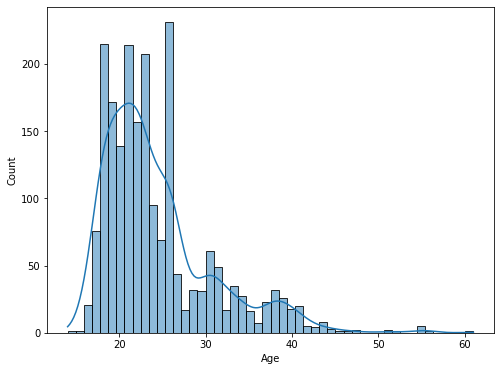

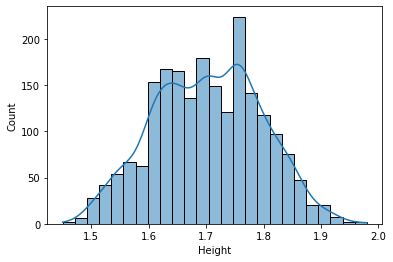

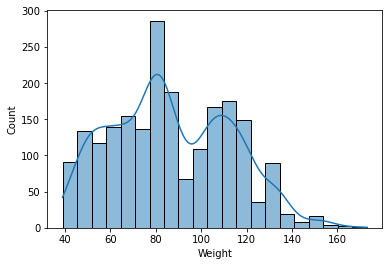

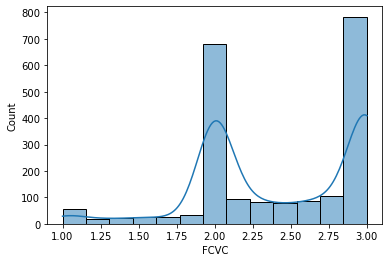

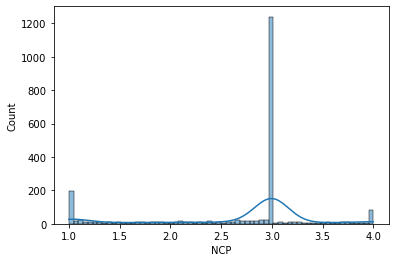

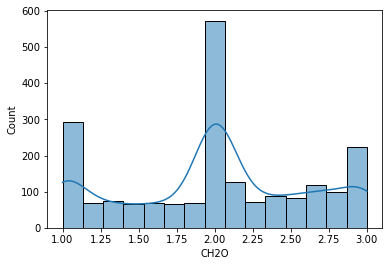

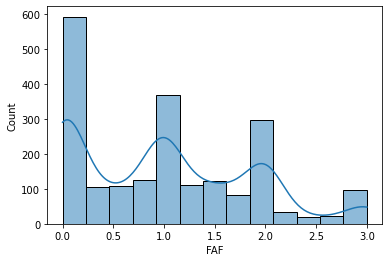

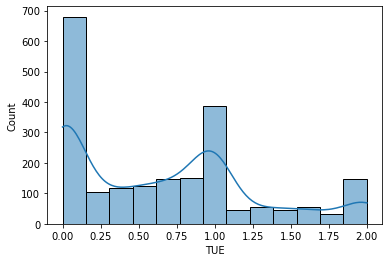

In [18]:
#Lets Plot some graphs of numerical features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=1
for i in numerical_columns:
    sns.histplot(data=data,x=i,kde=True)
    print("\n")
    plt.show()

In [19]:
#Observations :
#Distribution of Age column seems to be right skewed and most of the people are within range of 10 to 40.
#The youngest person in the dataset seems to be around 14 years old, and the oldest one - 60 years of age. 
#Some Oultliers can also be seen in Age column of dataset
#Distribution of Height and Weight seems slightly normally distributed.
#Most people are 1.60 m - 1.85 m tall. Both mean and median values are around 1.70. Still,

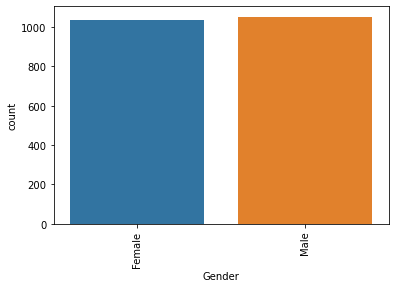

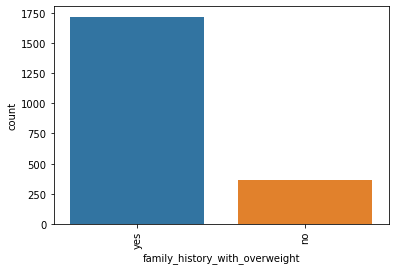

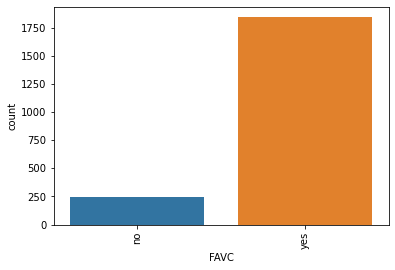

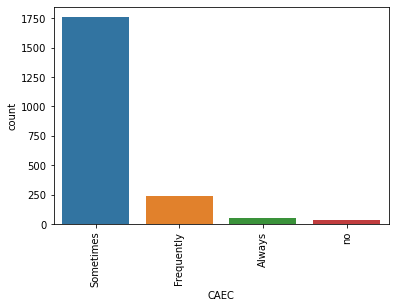

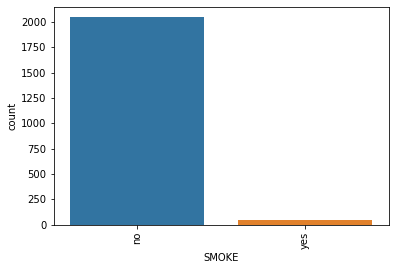

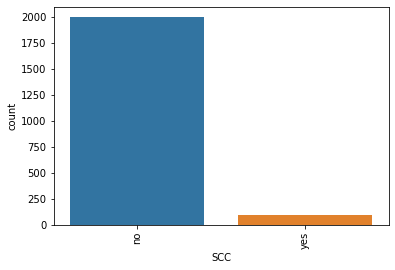

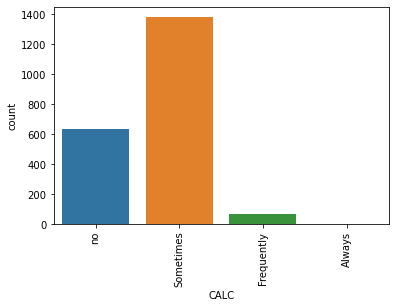

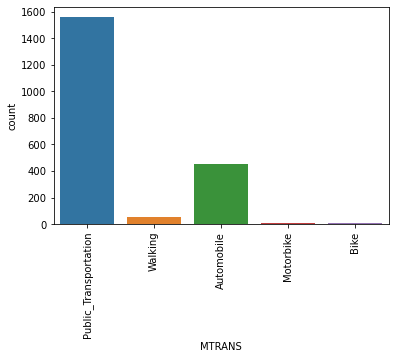

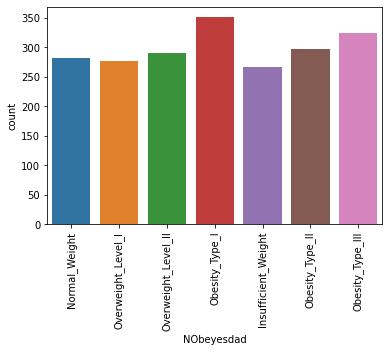

In [20]:
#Plot graph for Categorical variables
x=1
for i in categorical_columns:
    sns.countplot(data=data , x=i)
    print('\n')
    plt.xticks(rotation=90)
    plt.show()

In [21]:
#Observation:
#Proportion of both Male and Female seems equal in dataseet.
#People with family_history_with_overweight as yes is more in comparison,to family_history_with_overweight with no.
#people consuming higher caloric food is more in comparison to people not consuming high caloric food.
#Count of people consuming food between meals is higher for who take snacks in between meals Sometimes.
#people who smoke are very less.
#People who do not Monitor Calorie consumption are more in comparison to who monitor calorie consumption.
#Count of People consuming alcohol 'sometimes' are higher in comparison to other categories.
#Count of People who use Public transportation is more in comparison to automobile,walking,motorbike,bike.
#Count of records is higher for Obesity_Type_I.

In [22]:
#Relationship between independent and dependent variable

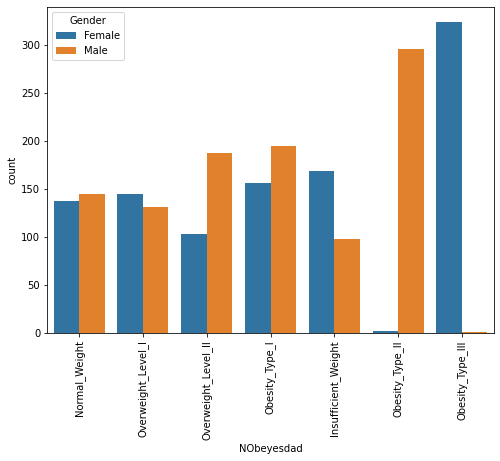

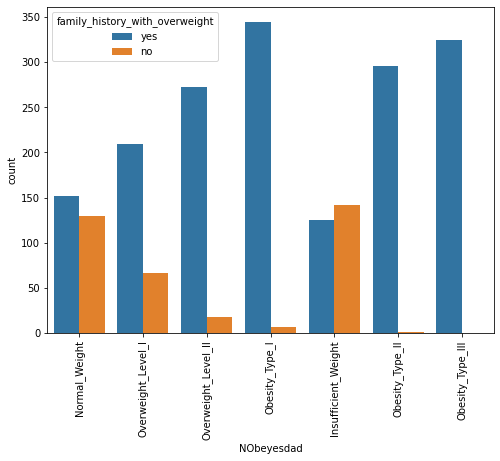

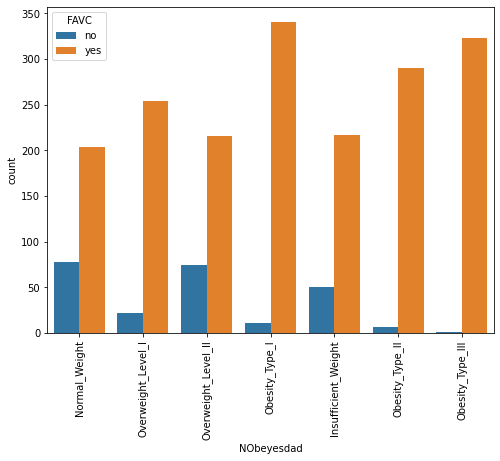

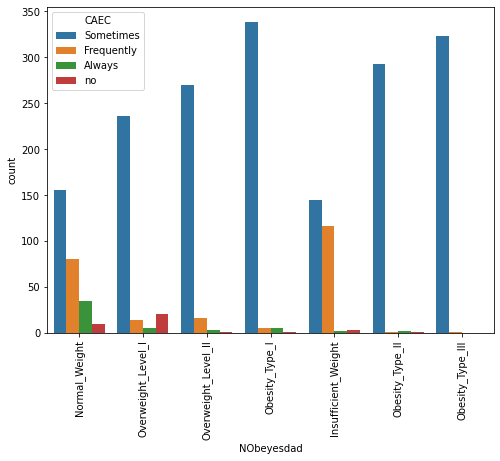

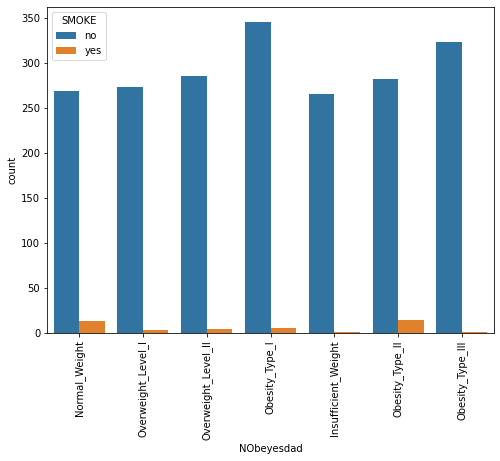

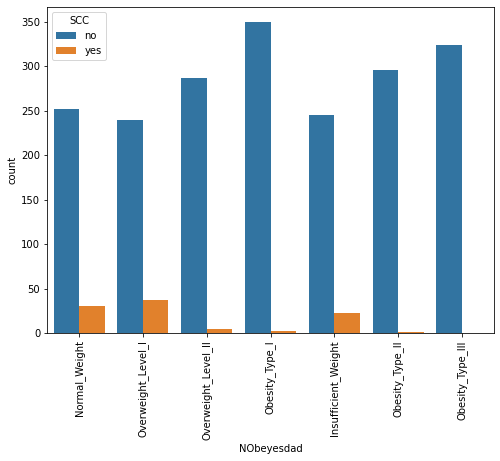

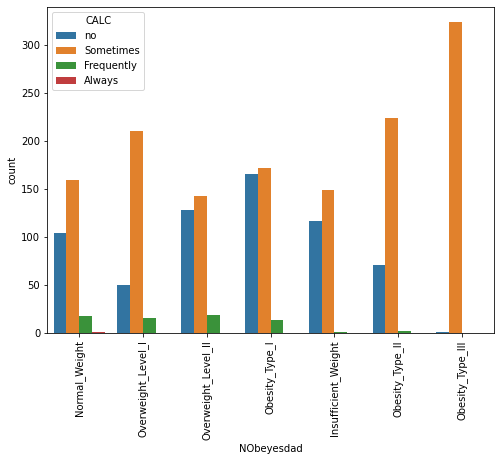

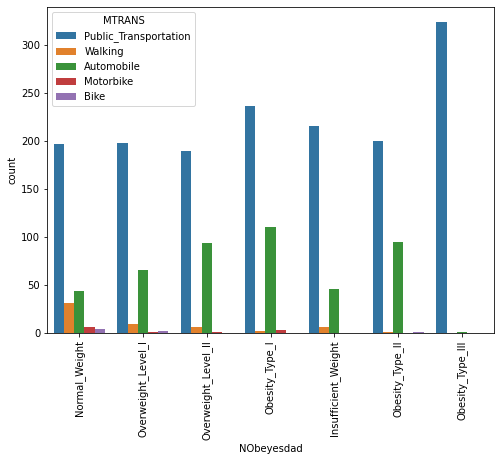

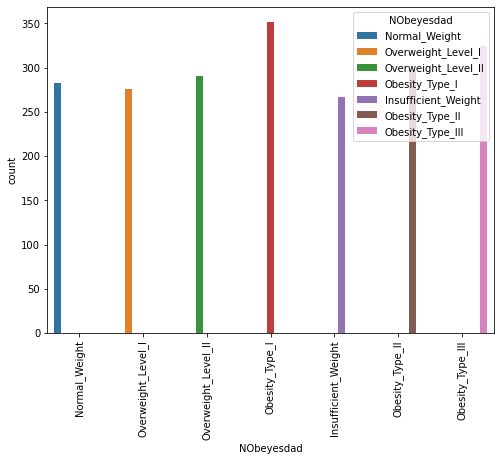

In [23]:
#Bivariate Analysis (Categor)

#Plot graph for Categorical variables with traget variable
x=1
for i in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=data , x="NObeyesdad",hue=i)
    print('\n')
    plt.xticks(rotation=90)
    plt.show()

#Observations :
#Women are more likely to have "Insufficient weight" than men. 
#On the other hand, there are more obese men than women, save in the last, extreme obesity category.
#It seems obesity runs in the family. 
#All those categorised as overweight or obese had family members suffering from weight problems.
#Both normal weight and overweight/obese people consume high calories food. Perhaps food quantity makes the difference and affects body fats.
#Weight of those who "frequently" or "always" get food between meals does not seem to be abnormal. Only people having snaks from time to time go into "Overweight" or "Obesity" categories.
#It seems smoking is not a predictor or does not affect body weight. There is a tiny number of smokers who could be both normal and overweight.
#People who tend to monitor their calories intake are less likely to get excess weight.
#The data suggest that people who "sometimes" drink alcohol could face weight propblems.
#Transportation seems does not (significantly) affect a person's weight. Both slim, normal and overweight people use public transport; all groups rely on cars as well.

<AxesSubplot:>

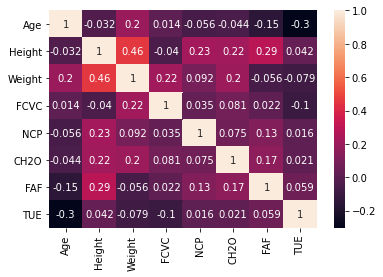

In [24]:
#Correlation
sns.heatmap(data.corr(),annot=True)

In [25]:
#There is positive correlation between height and weight so we can drop either of two variables.But we will not delete now.

In [26]:
data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [28]:
data['NObeyesdad'] = data['NObeyesdad'].map({'Normal_Weight' : 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 1, 'Insufficient_Weight': 0, \
 'Obesity_Type_I' : 2  , 'Obesity_Type_II' : 2, \
 'Obesity_Type_III' : 2 })

In [29]:
## Independent and dependent features
X = data.drop(labels=['NObeyesdad'],axis=1)
y = data[['NObeyesdad']]

In [30]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [31]:
y

,NObeyesdad
0,0
1,0
2,0
3,1
4,1
...,...
2106,2
2107,2
2108,2
2109,2


In [32]:
from sklearn.impute import SimpleImputer      #Handling Missing Values
from sklearn.preprocessing import StandardScaler   #Handling Feature Scaling
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
#pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [33]:
#Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

#Categorical Pipeline

cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('OneHotEncoder',OneHotEncoder()),
        ('scaler',StandardScaler())
    ]
)

#here we will combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_columns),
    ('cat_pipeline',cat_pipeline,categorical_columns)
])

In [34]:
#Train Test split    

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [39]:
import category_encoders as ce
enc=ce.OneHotEncoder().fit(data.NObeyesdad.astype(str))
y_onehot=enc.transform(data.NObeyesdad.astype(str))
y_onehot

,NObeyesdad_1,NObeyesdad_2,NObeyesdad_3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
2106,0,0,1
2107,0,0,1
2108,0,0,1
2109,0,0,1


In [40]:
preprocessor.fit_transform(X_train)

ValueError: A given column is not a column of the dataframe